In [15]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.model_selection import cross_val_score, StratifiedKFold, RandomizedSearchCV



In [16]:
df_data = pd.read_csv('/Users/sharcapri/venv_b4tm/Train_call.csv')
df_labels = pd.read_csv("/Users/sharcapri/venv_b4tm/Train_clinical.csv")
df_selection = pd.read_csv("/Users/sharcapri/venv_b4tm/merged_data_only_6_17.csv")
df_ANOVA = pd.read_csv("/Users/sharcapri/venv_b4tm/Train_call_anovaselected.csv")
df_data = pd.DataFrame(df_data)
df_labels = pd.DataFrame(df_labels)
df_selection = pd.DataFrame(df_selection)
df_ANOVA = pd.DataFrame(df_ANOVA)

In [17]:
trans = df_data.transpose()
#print(trans)
trans[2022]

V1            16
V2      68710277
V3      68751390
V4             5
V5             1
          ...   
V100           0
V101          -1
V102           0
V103          -1
V104           0
Name: 2022, Length: 104, dtype: object

In [18]:
trans = trans.rename(columns={trans.columns[0]: "Sample"})
print(trans)


          Sample      1       2       3       4       5        6        7  \
V1    Chromosome      1       1       1       1       1        1        1   
V2         Start   2927   85022  370546  471671  792533   912799  1271190   
V3           End  43870  216735  372295  786483  907406  1266212  1590570   
V4        Nclone      3       4       4       5      13       96       45   
V5     Array.129      0       0       0       0       0        0        0   
...          ...    ...     ...     ...     ...     ...      ...      ...   
V100    Array.10      0       0       0       0       0        0        0   
V101   Array.123      0       0       0       0       0        0        0   
V102   Array.100      0       0       0       0       0        0        0   
V103   Array.134     -1      -1      -1      -1      -1       -1       -1   
V104   Array.130      0       0       0       0       0        0        0   

            8        9  ...       2825       2826       2827       2828  \


In [5]:
trans= trans.drop(trans.index[0:4])
print(trans)

         Sample   1   2   3   4   5   6   7   8   9  ... 2825 2826 2827 2828  \
V5    Array.129   0   0   0   0   0   0   0   0   0  ...    2    2    2    2   
V6     Array.34   0   0   0   0   0   0   0   0   0  ...    1    1    1    1   
V7     Array.67   0   0   0   0   0   0   0   0   0  ...    1    1    1    1   
V8     Array.24   0   0   0   0   0   0   0  -1   0  ...    0    0    0    0   
V9     Array.22   0   0   0   0   0   0   0   0   0  ...    1    1    1    1   
...         ...  ..  ..  ..  ..  ..  ..  ..  ..  ..  ...  ...  ...  ...  ...   
V100   Array.10   0   0   0   0   0   0   0   0   0  ...    1    1    0    1   
V101  Array.123   0   0   0   0   0   0   0   0   0  ...    1    1    1    1   
V102  Array.100   0   0   0   0   0   0   0   0   0  ...    1    1    1    1   
V103  Array.134  -1  -1  -1  -1  -1  -1  -1  -1  -1  ...    1    1    1    1   
V104  Array.130   0   0   0   0   0   0   0   0   0  ...    1    1    1    1   

     2829 2830 2831 2832 2833 2834  
V5

In [6]:
numeric_columns = trans.columns.difference(['Sample'])
trans[numeric_columns] = trans[numeric_columns].apply(pd.to_numeric, errors='coerce')

print(trans)

         Sample  1  2  3  4  5  6  7  8  9  ...  2825  2826  2827  2828  2829  \
V5    Array.129  0  0  0  0  0  0  0  0  0  ...     2     2     2     2     0   
V6     Array.34  0  0  0  0  0  0  0  0  0  ...     1     1     1     1     1   
V7     Array.67  0  0  0  0  0  0  0  0  0  ...     1     1     1     1     1   
V8     Array.24  0  0  0  0  0  0  0 -1  0  ...     0     0     0     0     0   
V9     Array.22  0  0  0  0  0  0  0  0  0  ...     1     1     1     1     1   
...         ... .. .. .. .. .. .. .. .. ..  ...   ...   ...   ...   ...   ...   
V100   Array.10  0  0  0  0  0  0  0  0  0  ...     1     1     0     1     1   
V101  Array.123  0  0  0  0  0  0  0  0  0  ...     1     1     1     1     1   
V102  Array.100  0  0  0  0  0  0  0  0  0  ...     1     1     1     1     1   
V103  Array.134 -1 -1 -1 -1 -1 -1 -1 -1 -1  ...     1     1     1     1     1   
V104  Array.130  0  0  0  0  0  0  0  0  0  ...     1     1     1     1     1   

      2830  2831  2832  283

In [9]:
merged_df = pd.merge(trans, df_labels, on='Sample')
print(merged_df)


       Sample  1  2  3  4  5  6  7  8  9  ...  2826  2827  2828  2829  2830  \
0   Array.129  0  0  0  0  0  0  0  0  0  ...     2     2     2     0     1   
1    Array.34  0  0  0  0  0  0  0  0  0  ...     1     1     1     1     1   
2    Array.67  0  0  0  0  0  0  0  0  0  ...     1     1     1     1     1   
3    Array.24  0  0  0  0  0  0  0 -1  0  ...     0     0     0     0     0   
4    Array.22  0  0  0  0  0  0  0  0  0  ...     1     1     1     1     1   
..        ... .. .. .. .. .. .. .. .. ..  ...   ...   ...   ...   ...   ...   
95   Array.10  0  0  0  0  0  0  0  0  0  ...     1     0     1     1     1   
96  Array.123  0  0  0  0  0  0  0  0  0  ...     1     1     1     1     1   
97  Array.100  0  0  0  0  0  0  0  0  0  ...     1     1     1     1     1   
98  Array.134 -1 -1 -1 -1 -1 -1 -1 -1 -1  ...     1     1     1     1     1   
99  Array.130  0  0  0  0  0  0  0  0  0  ...     1     1     1     1     1   

    2831  2832  2833  2834    Subgroup  
0      1  

In [19]:
X = merged_df.drop(['Sample', 'Subgroup'], axis=1)
y = merged_df['Subgroup']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the decision tree classifier
clf = DecisionTreeClassifier()

# Train the decision tree classifier
clf.fit(X_train, y_train)

# Get feature importances
feature_importances = clf.feature_importances_

# Create a DataFrame to display feature importances
feature_importance_df_1 = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance score
feature_importance_df_1 = feature_importance_df_1.sort_values(by='Importance', ascending=False)

print(feature_importance_df_1)
new_filename = "feature_importance_df_1"
feature_importance_df_1.to_csv(new_filename, index=False)

     Feature  Importance
2184    2185    0.484863
1899    1900    0.158113
2751    2752    0.143644
1061    1062    0.112729
74        75    0.064520
...      ...         ...
947      948    0.000000
948      949    0.000000
949      950    0.000000
950      951    0.000000
2833    2834    0.000000

[2834 rows x 2 columns]


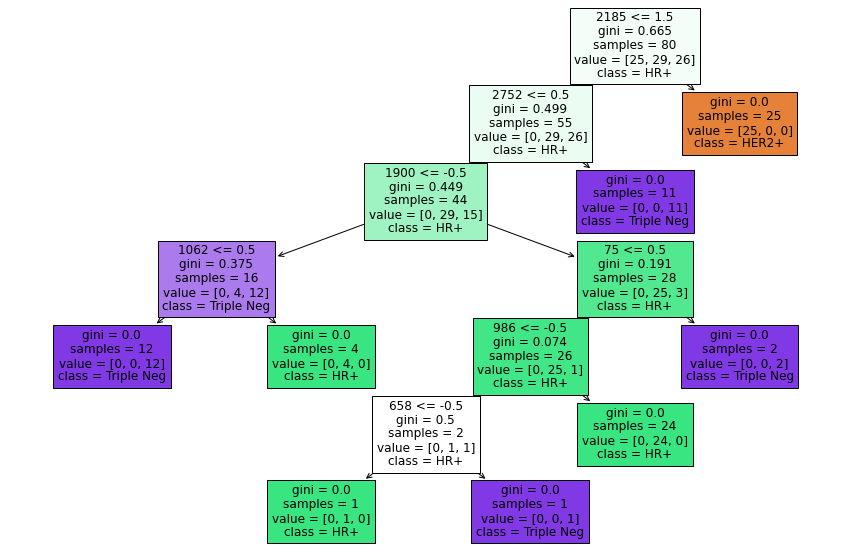

In [20]:
plt.figure(figsize=(15, 10))
plot_tree(clf, feature_names=X.columns, class_names=y.unique(), filled=True)
plt.show()

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)


rf_classifier.fit(X_train, y_train)


y_pred = rf_classifier.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.75


In [12]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[6 0 1]
 [0 6 1]
 [0 3 3]]


In [13]:
class_labels = ['HER2+', 'HR+', 'Triple Neg']


confusion_data = {'HER2+': [6, 0, 1],
                  'HR+': [0, 6, 1],
                  'Triple Neg': [0, 3, 3]}

# 
confusion_df = pd.DataFrame(confusion_data, index=class_labels)

# Calculate class error
confusion_df['class.error'] = 1 - confusion_df.apply(lambda row: row[row.name] / row.sum(), axis=1)

# Display the confusion matrix
print("Confusion matrix:")
print(confusion_df)



Confusion matrix:
            HER2+  HR+  Triple Neg  class.error
HER2+           6    0           0     0.000000
HR+             0    6           3     0.333333
Triple Neg      1    1           3     0.400000


In [13]:

X = merged_df.drop(['Sample', 'Subgroup'], axis=1)
y = merged_df['Subgroup']
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
param_distributions = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 7,3, 10],
    'min_samples_split': [2, 5, 10]
}

outer_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
inner_cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)


# Inner cross-validation for parameter search
model = RandomizedSearchCV(
    estimator= rf_classifier, param_distributions= param_distributions, cv=inner_cv, n_jobs=8
)
model.fit(X, y)
# Outer cross-validation to compute the testing score
test_score = cross_val_score(model, X, y, cv=outer_cv, n_jobs=8)
print(
    "The mean score using nested cross-validation is: "
    f"{test_score.mean():.3f} ± {test_score.std():.3f}"
)
best_model = model.best_estimator_
best_params = model.best_params_
print("Best Model:", best_model)
print("Best Parameters:", best_params)

The mean score using nested cross-validation is: 0.700 ± 0.084
Best Model: RandomForestClassifier(max_depth=5, min_samples_split=10, n_estimators=50,
                       random_state=42)
Best Parameters: {'n_estimators': 50, 'min_samples_split': 10, 'max_depth': 5}


In [15]:
test_score = cross_val_score(best_model, X, y, cv=outer_cv, n_jobs=2)
print(
    "The mean score using nested cross-validation is: "
    f"{test_score.mean():.3f} ± {test_score.std():.3f}"
)

The mean score using nested cross-validation is: 0.660 ± 0.066


In [48]:
merged_df

,Sample,1,2,3,4,5,6,7,8,9,...,2826,2827,2828,2829,2830,2831,2832,2833,2834,Subgroup
0,Array.129,0,0,0,0,0,0,0,0,0,...,2,2,2,0,1,1,1,1,1,HER2+
1,Array.34,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,HR+
2,Array.67,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,HR+
3,Array.24,0,0,0,0,0,0,0,-1,0,...,0,0,0,0,0,0,0,0,0,Triple Neg
4,Array.22,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,Triple Neg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Array.10,0,0,0,0,0,0,0,0,0,...,1,0,1,1,1,1,1,1,1,HER2+
96,Array.123,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,HR+
97,Array.100,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,HR+
98,Array.134,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,1,1,1,1,1,1,1,1,1,HR+


In [22]:
df_excluded = merged_df.drop(columns=[5, 1699, 1870, 2022 ])
df_excluded
new_filename = "df_dt_excluded"
df_excluded.to_csv(new_filename, index=False)

In [23]:
X = df_excluded.drop(['Sample', 'Subgroup'], axis=1)
y = df_excluded['Subgroup']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)


rf_classifier.fit(X_train, y_train)


y_pred = rf_classifier.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)
class_labels = ['HER2+', 'HR+', 'Triple Neg']


confusion_data = {'HER2+': [7, 0, 0],
                  'HR+': [0, 6, 1],
                  'Triple Neg': [0, 2, 4]}

# 
confusion_df = pd.DataFrame(confusion_data, index=class_labels)

# Calculate class error
confusion_df['class.error'] = 1 - confusion_df.apply(lambda row: row[row.name] / row.sum(), axis=1)

# Display the confusion matrix
print("Confusion matrix:")
print(confusion_df)




Accuracy: 0.85
Confusion Matrix:
[[7 0 0]
 [0 6 1]
 [0 2 4]]
Confusion matrix:
            HER2+  HR+  Triple Neg  class.error
HER2+           7    0           0         0.00
HR+             0    6           2         0.25
Triple Neg      0    1           4         0.20


     Feature  Importance
2180    2185    0.484863
73        75    0.143644
693      695    0.113491
1655    1657    0.065578
167      169    0.059461
...      ...         ...
948      950    0.000000
949      951    0.000000
950      952    0.000000
951      953    0.000000
2829    2834    0.000000

[2830 rows x 2 columns]


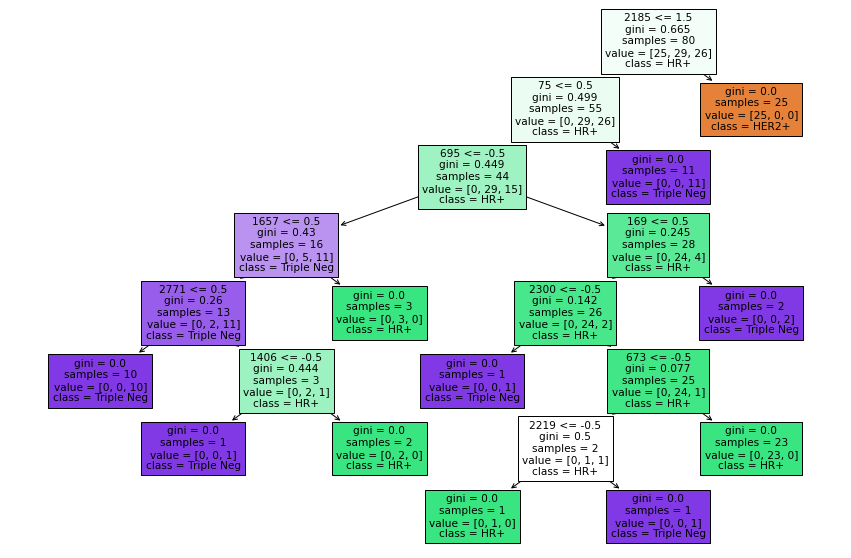

In [28]:
X = df_excluded.drop(['Sample', 'Subgroup'], axis=1)
y = df_excluded['Subgroup']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the decision tree classifier
clf = DecisionTreeClassifier()

# Train the decision tree classifier
clf.fit(X_train, y_train)

# Get feature importances
feature_importances = clf.feature_importances_

# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance score
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print(feature_importance_df)
plt.figure(figsize=(15, 10))
plot_tree(clf, feature_names=X.columns, class_names=y.unique(), filled=True)
plt.show()

new_filename = "feature_importance_df"
feature_importance_df.to_csv(new_filename, index=False)

In [96]:
# Assuming 'label_column' is the name of the column containing the label
unique_variables = df_labels['Subgroup'].value_counts()

# Print the unique variables and their counts
print(unique_variables)

HR+           36
HER2+         32
Triple Neg    32
Name: Subgroup, dtype: int64


In [29]:
X = df_selection.drop(['Sample', 'Subgroup'], axis=1)
y = df_selection['Subgroup']


test_score = cross_val_score(rf_classifier, X, y, cv=outer_cv, n_jobs=8)
print(
    "The mean score using nested cross-validation is: "
    f"{test_score.mean():.3f} ± {test_score.std():.3f}"
)

The mean score using nested cross-validation is: 0.660 ± 0.162
